Aqui vamos rever os seguintes conceitos de estatística:

* O que é uma distribuição?
* Quais os tipos de distribuição existentes?
* O que é a média, moda, mediana, desvio padrão?
* Normalização de dados
* Central Limit Theorem

In [26]:
%matplotlib inline
import numpy as np
import seaborn as sns

## O que é uma distribuição?

## Quantas amostras até ter uma boa distribuição?

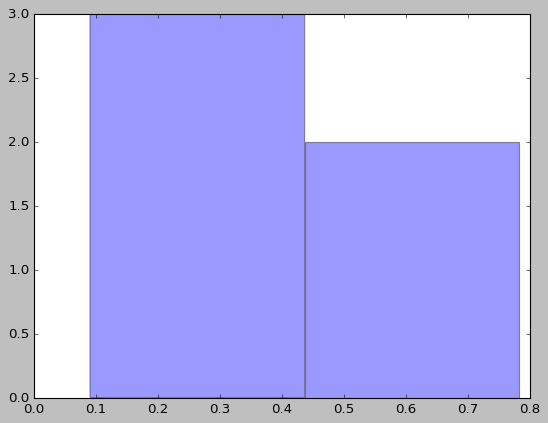

In [37]:
N = 5
x = np.random.random(size=N)
sns.distplot(x, kde=False)

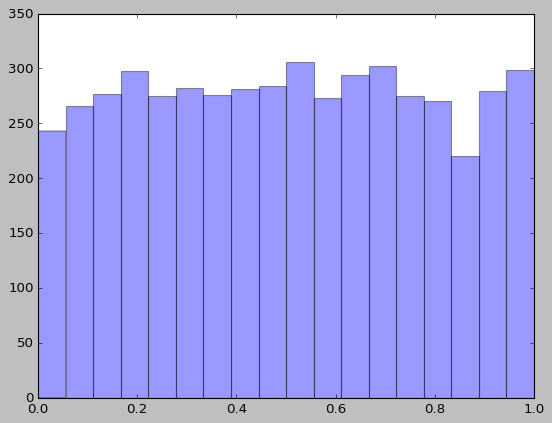

In [39]:
N = 5000
x = np.random.random(size=N)
sns.distplot(x, kde=False)

## Alguns tipos de distribuição

Em uma distribuição uniforme, todos os valores tem "a mesma probabilidade" de ocorrer.

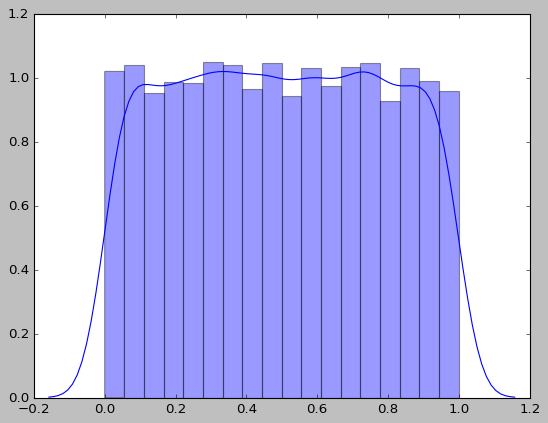

In [40]:
uniforme = np.random.uniform(size=N)
sns.distplot(uniforme, kde=True)

Em uma distribuição normal (gaussiana) os valores mais próximos de $\mu$ (média) com $\pm \sigma$ (desvio padrão) são mais frequentes.

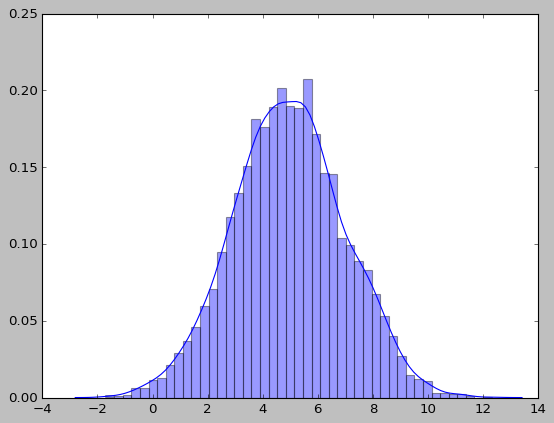

In [41]:
media = 5
desvio_padrao = 2
normal = np.random.normal(loc=media, scale=desvio_padrao, size=N)
sns.distplot(normal, kde=True)

Em uma distribuição exponencial, os valores da calda são mais frequentes.

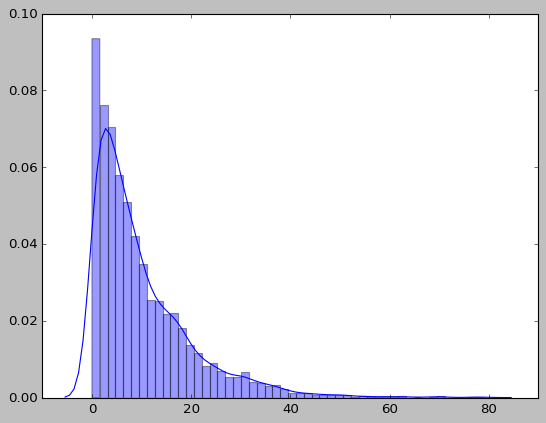

In [48]:
beta = 1.0 / 0.1
exponencial = np.random.exponential(scale=beta, size=N)
sns.distplot(exponencial, kde=True)

## Medidas de tendência central: média, moda, mediana

Estas três medidas de tendência central indicam, como é de se esperar, onde é o centro de uma distribuição.
Não é o caso de sempre ser exatamente o centro, mas a ideia é estar próximo.

In [3]:
# vamos assumir um conjunto de dados aleatórios x com N amostras

N = 1000
x = np.random.random(1000)

A média é calculada conforme $\bar{x} = \frac{1}{N}\sum_{i=1}^{N}x_i$

In [7]:
# existem algumas formas de calcular a média com python

# um for padrão
media = 0
for i in range(N):
    media += x[i]

media = (1.0 / N) * media
print(media)

# utilizando a soma
media = (1.0 / N) * sum(x)
print(media)

# utilizando a função mean
media = np.mean(x)
print(media)

0.491767777833
0.491767777833
0.491767777833


A mediana é o valor exatamente no centro do conjunto de dados. Portanto, 50% dos dados são menores que a mediana e 50% 
são maiores.

Para um conjunto com tamanho ímpar, a mediana é definida como $\hat{x} = x_{\frac{N + 1}{2}}$ sendo que x é um conjunto
ordenado.

Para um conjunto de tamanho par, a mediana é definida como $\hat{x} = \frac{1}{2} * (x_{\frac{N}{2}} + x_{\frac{N}{2} - 1})$ sendo que x é um conjunto

In [12]:
# também existem algumas formas de encontrar a variância

# ordenando e obtendo os valores
s = sorted(x)
mediana = (1.0 / 2) * (s[int(N / 2)] + s[int(N / 2) - 1])
print(mediana)

# função median
mediana = np.median(x)
print(mediana)

0.497386412504
0.497386412504


A moda é simplesmente o valor mais frequente no conjunto de dados.

In [15]:
# aqui vamos direto ao ponto
from scipy.stats import mode

moda = mode(x)
print(moda)

ModeResult(mode=array([ 0.00094779]), count=array([1]))


In [19]:
# contando os valores únicos no conjunto de dados
(unicos, quantidades) = np.unique(x, return_counts=True)
unicos.shape

(1000,)

In [23]:
# separamos os valores em 10 conjuntos
(quantidades, bins) = np.histogram(x, bins=10)

# pegamos o índice com maior quantidade de valores
indice = np.argmax(quantidades)

print(indice, indice + 1)
print(quantidades)
print(bins)

5 6
[105 108  87 105  97 114  99 102  93  90]
[  9.47785345e-04   1.00843985e-01   2.00740185e-01   3.00636386e-01
   4.00532586e-01   5.00428786e-01   6.00324986e-01   7.00221186e-01
   8.00117386e-01   9.00013586e-01   9.99909786e-01]


## Quanto a minha distribuição está espalhada?

In [ ]:
# TBD

## Normalização

Supondo duas distribuições $x_1$ e $x_2$ com diferentes médias e desvios padrões, como podemos compará-las?

Para isso, é necessário normalizá-las para que as duas tenham $\mu = 0$ e $\sigma = 1$.

Dessa forma, as duas distribuições tem os valores no mesmo intervalo.

A forma geral para normalizar uma distribuição é $x_i' = \frac{x_i - \bar{x}}{\sigma_{x}}$

x1 3.01051429894 2.98262614205
x2 6.998367429 1.00410968387


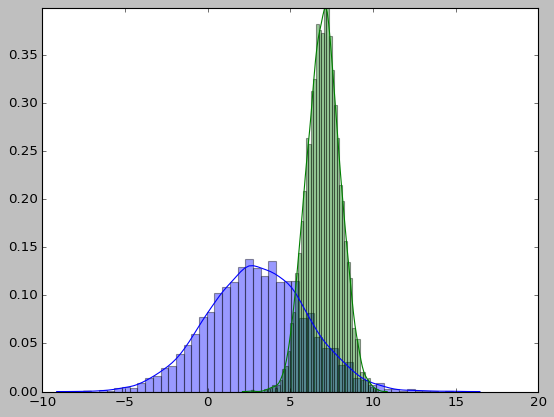

In [52]:
# duas distribuições
x1 = np.random.normal(loc=3, scale=3, size=N)
x2 = np.random.normal(loc=7, scale=1, size=N)

sns.distplot(x1, kde=True)
sns.distplot(x2, kde=True)

print('x1', x1.mean(), x1.std())
print('x2', x2.mean(), x2.std())

x1_prime 8.24229573482e-17 1.0
x2_prime 4.75353090224e-16 1.0


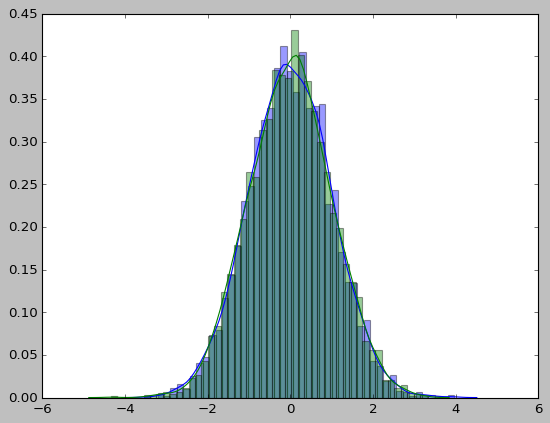

In [53]:
x1_prime = (x1 - x1.mean()) / x1.std()
x2_prime = (x2 - x2.mean()) / x2.std()

sns.distplot(x1_prime, kde=True)
sns.distplot(x2_prime, kde=True)

print('x1_prime', x1_prime.mean(), x1_prime.std())
print('x2_prime', x2_prime.mean(), x2_prime.std())

x1_prime 8.24229573482e-17 1.0
x2_prime 4.75353090224e-16 1.0


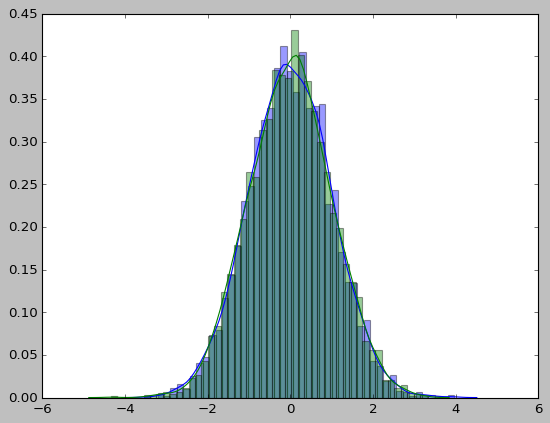

In [69]:
# usando o scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x1.reshape(-1, 1))
x1_prime = scaler.transform(x1.reshape(-1, 1)).reshape(-1)

x2_prime = scaler.fit_transform(x2.reshape(-1, 1)).reshape(-1)

sns.distplot(x1_prime, kde=True)
sns.distplot(x2_prime, kde=True)

print('x1_prime', x1_prime.mean(), x1_prime.std())
print('x2_prime', x2_prime.mean(), x2_prime.std())

## Central Limit Theorem